In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
all_raw = pd.read_csv('cleansed_data//all_consumption_metadata.csv', parse_dates=True, index_col=0,
                     dtype={'loc_id':'str', 'consumption_kvah':'float32', 'temperature':'float32',
                           'el_price':'float32', 'oil_price':'float32'})
all_raw.head()

,loc_id,consumption_kvah,temperature,el_price,oil_price
time,,,,,
2018-01-01 00:00:00,0,27.0,5.5,26.330000,66.730003
2018-01-01 01:00:00,0,27.5,5.0,26.430000,66.730003
2018-01-01 02:00:00,0,27.0,4.8,26.100000,66.730003
2018-01-01 03:00:00,0,23.0,4.9,24.700001,66.730003
2018-01-01 04:00:00,0,23.0,3.7,24.740000,66.730003


In [3]:
all_df = all_raw.copy()

In [4]:
loc_ids = all_df['loc_id'].unique()

d = {}

for loc in loc_ids: 
    d[loc] = all_df[all_df['loc_id']==loc]

In [5]:
df = d['1'].drop('loc_id', axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('consum')
y = df['consumption_kvah']

In [12]:
X_train = X.iloc[:-100]
X_test = X.iloc[-100:]

y_train = y[:-100]
y_test = y[-100:]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
reg = RandomForestRegressor()

In [15]:
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
y_pred = reg.predict(X_test)

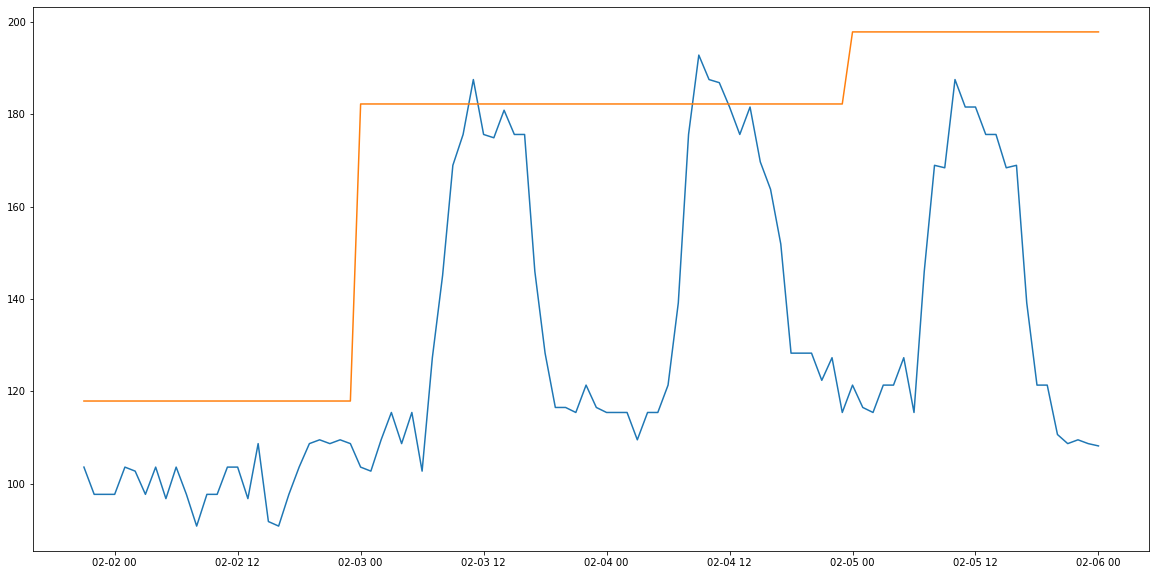

In [21]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.plot(y_test.index, y_test)
ax.plot(y_test.index, y_pred)

plt.show()